# Genes shared by *H. inflata, Trepomonas, K. bialata*

marked as green-red



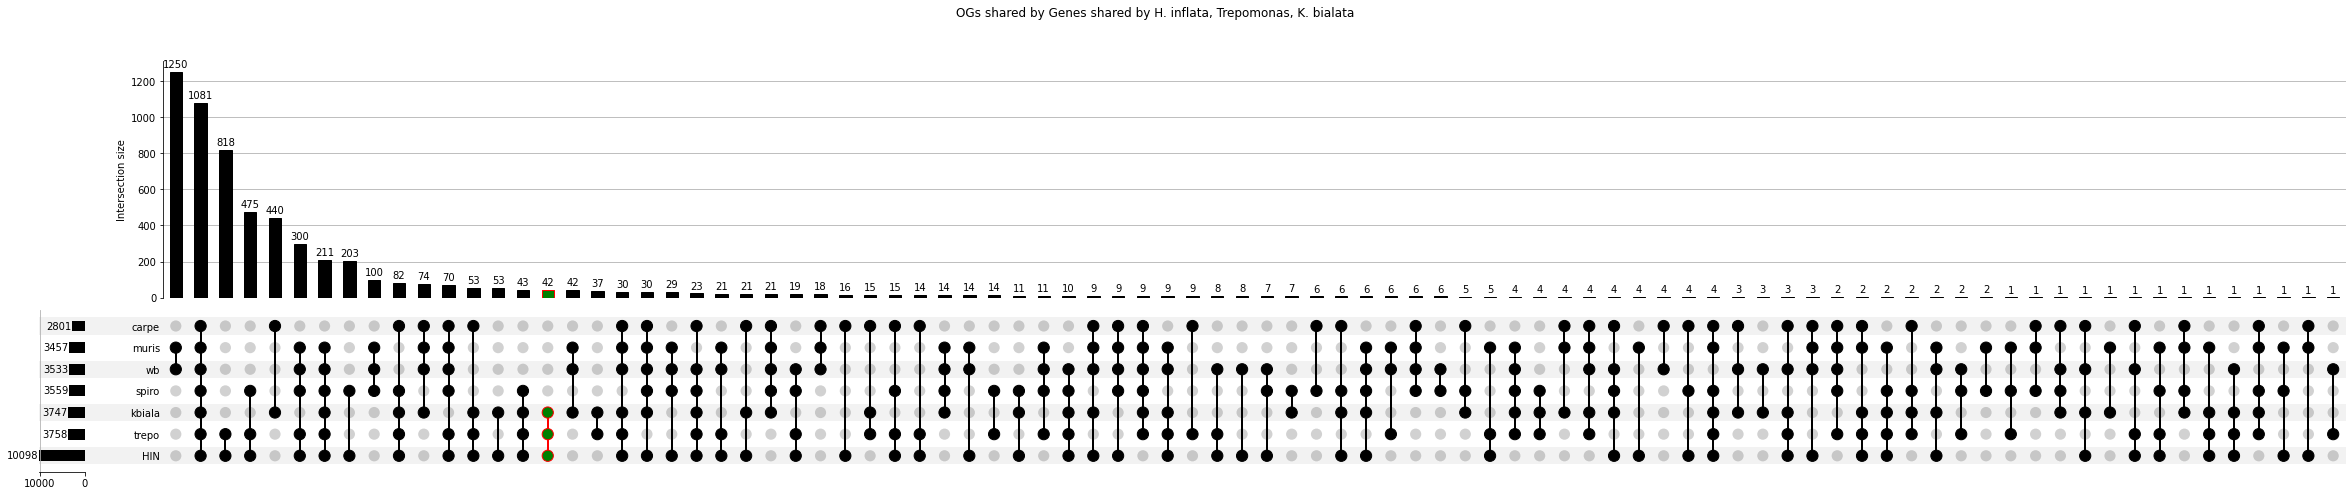

In [6]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["spiro", "wb", "muris", "carpe"],
                    min_degree=3,
                    facecolor="green",
                    edgecolor="red")

upset.plot()
plt.suptitle("OGs shared by Genes shared by H. inflata, Trepomonas, K. bialata")
plt.show()

## Extract genes from OGs

In [3]:
"OG shared by Free-livings HIN, trepo, kbiala, carpe"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_hin_trepo_kbiala=df[(df.iloc[:,[1,2,6]] >=1).all(1)  & (df.iloc[:,[3,4,5,7]] ==0).all(1)]

print("Number of OGs= ", len(og_hin_trepo_kbiala["Orthogroup"]))
print("Total HIN genes =", og_hin_trepo_kbiala["HIN"].sum())
print("Total trepo genes =", og_hin_trepo_kbiala["trepo"].sum())
print("Total kbiala genes =", og_hin_trepo_kbiala["kbiala"].sum())

og_hin_trepo_kbiala.head()

Number of OGs=  42
Total HIN genes = 347
Total trepo genes = 83
Total kbiala genes = 68


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
193,OG0000193,53,1,0,0,0,1,0,55
203,OG0000203,48,2,0,0,0,3,0,53
303,OG0000303,33,2,0,0,0,4,0,39
417,OG0000417,28,1,0,0,0,1,0,30
535,OG0000535,23,1,0,0,0,1,0,25


In [4]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_hin_trepo_kbiala).head()

,OG0000193,OG0000203,OG0000303,OG0000417,OG0000535,OG0000552,OG0000786,OG0000969,OG0001007,OG0001116,...,OG0005604,OG0005658,OG0005759,OG0005892,OG0005951,OG0006002,OG0007010,OG0007087,OG0009909,OG0009972
1,HIN_011431,HIN_012221,HIN_004974,HIN_000349,HIN_008707,HIN_000946,HIN_024331,HIN_003312,HIN_020028,HIN_019349,...,HIN_021897,HIN_024186,HIN_031859,HIN_041506,HIN_049325,HIN_057773,HIN_021561,HIN_023466,HIN_057389,HIN_061544
2,HIN_030199,HIN_012230,HIN_004975,HIN_000351,HIN_016223,HIN_000949,HIN_052552,HIN_003334,HIN_020048,HIN_019353,...,HIN_056709,HIN_069000,HIN_064251,TPC1_16424,HIN_057927,HIN_062630,HIN_087244,HIN_080168,TPC1_11432,TPC1_10727
3,HIN_030202,HIN_012233,HIN_004976,HIN_009896,HIN_016225,HIN_001010,HIN_099093,HIN_003337,HIN_039541,HIN_053408,...,HIN_077380,HIN_083599,HIN_096292,g5422.t1_kipferlia,TPC1_13430,HIN_088228,TPC1_10313,TPC1_14273,g3722.t1_kipferlia,g10843.t1_kipferlia
4,HIN_030205,HIN_021536,HIN_004979,HIN_009898,HIN_016227,HIN_001047,TPC1_11085,HIN_003344,HIN_063594,HIN_053412,...,TPC1_16598,TPC1_16010,TPC1_16492,g5687.t1_kipferlia,g13932.t1_kipferlia,TPC1_14914,g11781.t1_kipferlia,g11062.t1_kipferlia,NaN,NaN
5,HIN_030212,HIN_023387,HIN_005065,HIN_009900,HIN_016229,HIN_001048,TPC1_11175,HIN_069413,HIN_063619,HIN_067164,...,g6263.t1_kipferlia,g2737.t1_kipferlia,g10457.t1_kipferlia,g8581.t1_kipferlia,g5367.t1_kipferlia,g10257.t1_kipferlia,NaN,NaN,NaN,NaN


In [5]:
extract_prot(og_hin_trepo_kbiala).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_kbiala.csv", header="infer", index=False, sep="\t")